# ****Learning - Binary Classification****
###KELOMPOK 1 (IF-44-08)
Anggota :
*   Anyelir Belia Azzahra (1301200048)
*   Risma Amaliyah Mahmudah (1301204087)
*   Muhammad Rafi Irfansyah (1301204500)

In [ ]:
#import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
#untuk menyimpan output ke file dalam drive
from google.colab import drive

In [ ]:
!gdown --id 1oHwMSB3NeKYMpQCjwuSd7dbb6zpAYhyj

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1oHwMSB3NeKYMpQCjwuSd7dbb6zpAYhyj
To: /content/traintest.xlsx
100% 17.7k/17.7k [00:00<00:00, 17.3MB/s]


In [ ]:
df = pd.read_excel('./traintest.xlsx')
df = df.drop('id', axis=1)

df.head()

,x1,x2,x3,y
0,60,64,0,1
1,54,60,11,0
2,65,62,22,0
3,34,60,0,1
4,38,69,21,0


1    218
0     78
Name: y, dtype: int64


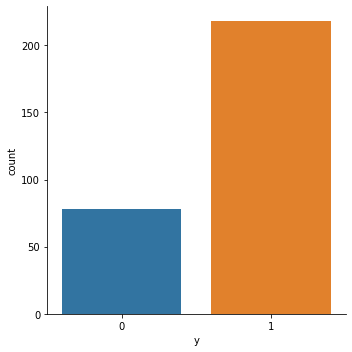

In [ ]:
print(df['y'].value_counts())
sns.catplot(x='y', data=df, kind='count')
plt.show()

In [ ]:
x_data = df.drop("y", axis=1).to_numpy() 
y_data = df["y"].to_numpy()

In [ ]:
x_data

array([[60, 64,  0],
       [54, 60, 11],
       [65, 62, 22],
       [34, 60,  0],
       [38, 69, 21],
       [33, 58, 10],
       [63, 61,  0],
       [57, 64,  0],
       [46, 58,  3],
       [43, 65,  0],
       [60, 59, 17],
       [70, 59,  8],
       [69, 60,  0],
       [57, 61,  5],
       [67, 61,  0],
       [68, 67,  0],
       [49, 61,  1],
       [47, 58,  3],
       [48, 67,  7],
       [66, 58,  1],
       [57, 64,  9],
       [46, 63,  0],
       [36, 60,  1],
       [52, 64,  0],
       [51, 64,  7],
       [41, 60, 23],
       [53, 58,  4],
       [50, 64,  0],
       [56, 66,  2],
       [45, 67,  0],
       [70, 67,  0],
       [45, 67,  1],
       [37, 63,  0],
       [61, 65,  8],
       [50, 65,  4],
       [77, 65,  3],
       [57, 69,  0],
       [62, 65, 19],
       [65, 67,  1],
       [44, 63,  1],
       [49, 62,  1],
       [55, 58,  1],
       [61, 68,  1],
       [49, 62,  0],
       [61, 64,  0],
       [41, 64,  0],
       [52, 68,  0],
       [38, 6

In [ ]:
y_data

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
x_data, y_data = SMOTE().fit_resample(x_data, y_data)

In [ ]:
df_new = pd.DataFrame()
df_new['y'] = y_data
df_new

,y
0,1
1,0
2,0
3,1
4,0
...,...
431,0
432,0
433,0
434,0


1    218
0    218
Name: y, dtype: int64


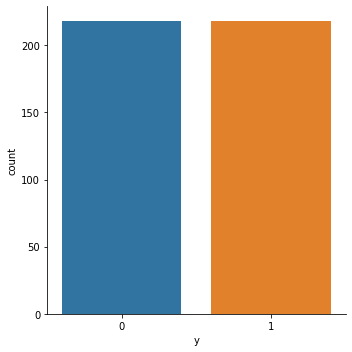

In [ ]:
print(df_new['y'].value_counts())
sns.catplot(x='y', data=df_new, kind='count')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

##**Metode yang Digunakan ( training model )**

In [ ]:
class KNN:
  def __init__(self, k=5):
    self.K = k

  #mendeskripsikan x dan y 
  def train(self, X, y): # x merupakan data x suatu kolom, y merupakan label
    self.X_train = X
    self.y_train = y

  
  def predict(self, X):
    y_prediksi = []
    for i in range(len(X)):
      y_prediksi.append(self._prediksi(X[i]))

    return np.array(y_prediksi)
    
  #dilakukan perhitungan jarak untuk setiap kolom
  def _prediksi(self, x):

    # 1. hitung jarak ke semua data training
    jarak_titik = [self.jarak(x, x_train) for x_train in self.X_train]

    # 2. urutkan berdasrkan jarak terdekat
    k_terbaik = np.argsort(jarak_titik)[:self.K]

    # 3. ambil label k terbaik
    label_k_terbaik = [self.y_train[i] for i in k_terbaik]

    # 4. voting yang paling banyak
    hasil_voting = Counter(label_k_terbaik).most_common(1)

    return hasil_voting[0][0]

  def jarak(self, x1, x2):
    # Euclidean Distance
    return np.sqrt(np.sum((x1-x2)**2))

##**Menyimpan model hasil training**

In [ ]:
model_knn = KNN(k=3)
model_knn.train(x_train, y_train)

In [ ]:
x_train

array([[42, 59,  2],
       [61, 64,  0],
       [52, 62,  1],
       ...,
       [65, 67,  0],
       [51, 66,  1],
       [53, 65, 12]])

##**Prediksi Data Test**

In [ ]:
hasil_knn = model_knn.predict(x_test)

In [ ]:
print(hasil_knn)

[0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 0 0 0]


##**Pengujian / Testing Model**

In [ ]:
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0])

##**Evaluasi Model**

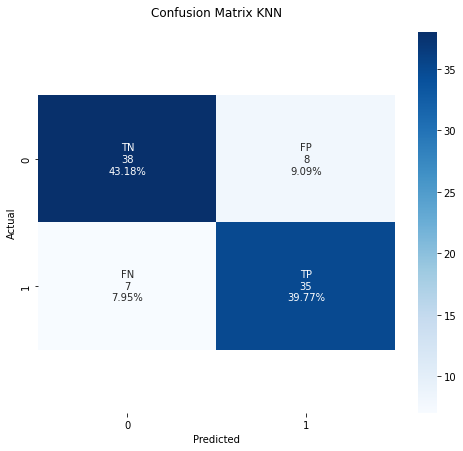

              precision    recall  f1-score   support

           0       0.84      0.83      0.84        46
           1       0.81      0.83      0.82        42

    accuracy                           0.83        88
   macro avg       0.83      0.83      0.83        88
weighted avg       0.83      0.83      0.83        88



In [ ]:
conf_matrix_knn = confusion_matrix(y_test, hasil_knn)

plt.figure(figsize=(8, 7))

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_knn.flatten() / np.sum(conf_matrix_knn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix_knn, annot=labels, xticklabels=[0, 1], yticklabels=[0, 1], cmap='Blues', fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix KNN', pad=16)
plt.show()

print(classification_report(y_test, hasil_knn))

In [ ]:
def accuracy_metric(actual, predicted):
  correct = 0

  for i in range(len(actual)):
    if actual[i] == predicted[i]:
      correct = correct + 1

  return correct / float(len(actual)) * 100.0 

In [ ]:
print("Accuracy : ", accuracy_metric(y_test, hasil_knn))

Accuracy :  82.95454545454545


In [ ]:
df_test = pd.read_excel('./traintest.xlsx', 'test')
df_test.head()

,id,x1,x2,x3,y
0,297,43,59,2,?
1,298,67,66,0,?
2,299,58,60,3,?
3,300,49,63,3,?
4,301,45,60,0,?


In [ ]:
df_id = df_test[['id']]
df_out = df_test[['x1', 'x2', 'x3']]

In [ ]:
df_id.head()

,id
0,297
1,298
2,299
3,300
4,301


In [ ]:
df_out.head()

,x1,x2,x3
0,43,59,2
1,67,66,0
2,58,60,3
3,49,63,3
4,45,60,0


In [ ]:
df_out_arr = df_out.to_numpy()
hasil_prediksi = model_knn.predict(df_out_arr)

In [ ]:
print(hasil_prediksi)

[1 1 0 1 1 1 0 0 1 1]


In [ ]:
df_out.insert(3, 'y', hasil_prediksi)
df_out.insert(0, "id", df_id)
df_out

,id,x1,x2,x3,y
0,297,43,59,2,1
1,298,67,66,0,1
2,299,58,60,3,0
3,300,49,63,3,1
4,301,45,60,0,1
5,302,54,58,1,1
6,303,56,66,3,0
7,304,42,69,1,0
8,305,50,59,2,1
9,306,59,60,0,1


##**Menyimpan output ke file**

In [ ]:
drive.mount('/drive')
df_out.to_excel('/drive/My Drive/TUPRO3/output.xlsx', index=False)